In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/Fish-1.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing_data_table(df)

,Total,Percent
Width,0,0.0
Height,0,0.0
Length3,0,0.0
Length2,0,0.0
Length1,0,0.0
Weight,0,0.0
Species,0,0.0


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


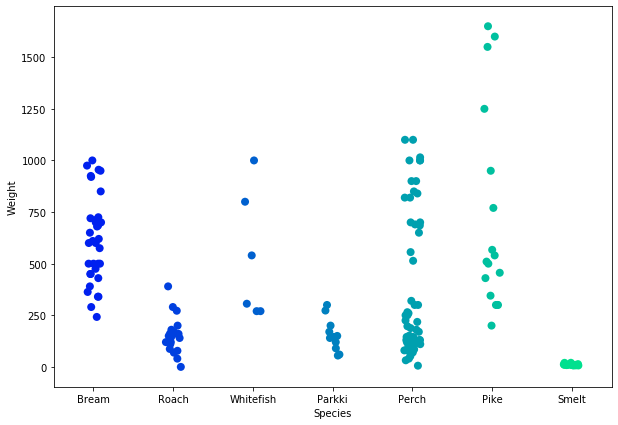

In [7]:
#range of width vs speices
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Species',y='Weight',data=df,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

In [8]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

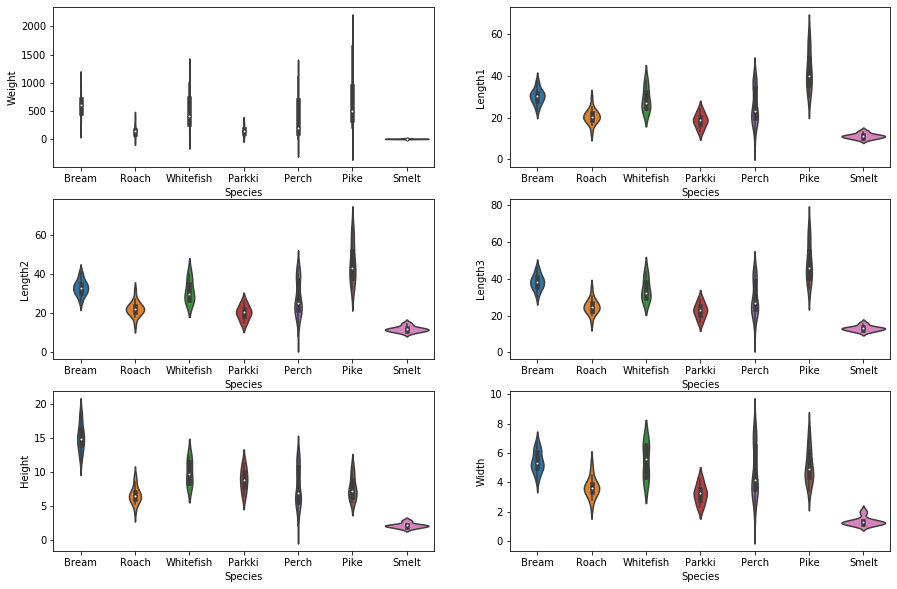

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.violinplot(x='Species',y='Weight',data=df)
plt.subplot(3,2,2)
sns.violinplot(x='Species',y='Length1',data=df)
plt.subplot(3,2,3)
sns.violinplot(x='Species',y='Length2',data=df)
plt.subplot(3,2,4)
sns.violinplot(x='Species',y='Length3',data=df)
plt.subplot(3,2,5)
sns.violinplot(x='Species',y='Height',data=df)
plt.subplot(3,2,6)
sns.violinplot(x='Species',y='Width',data=df)

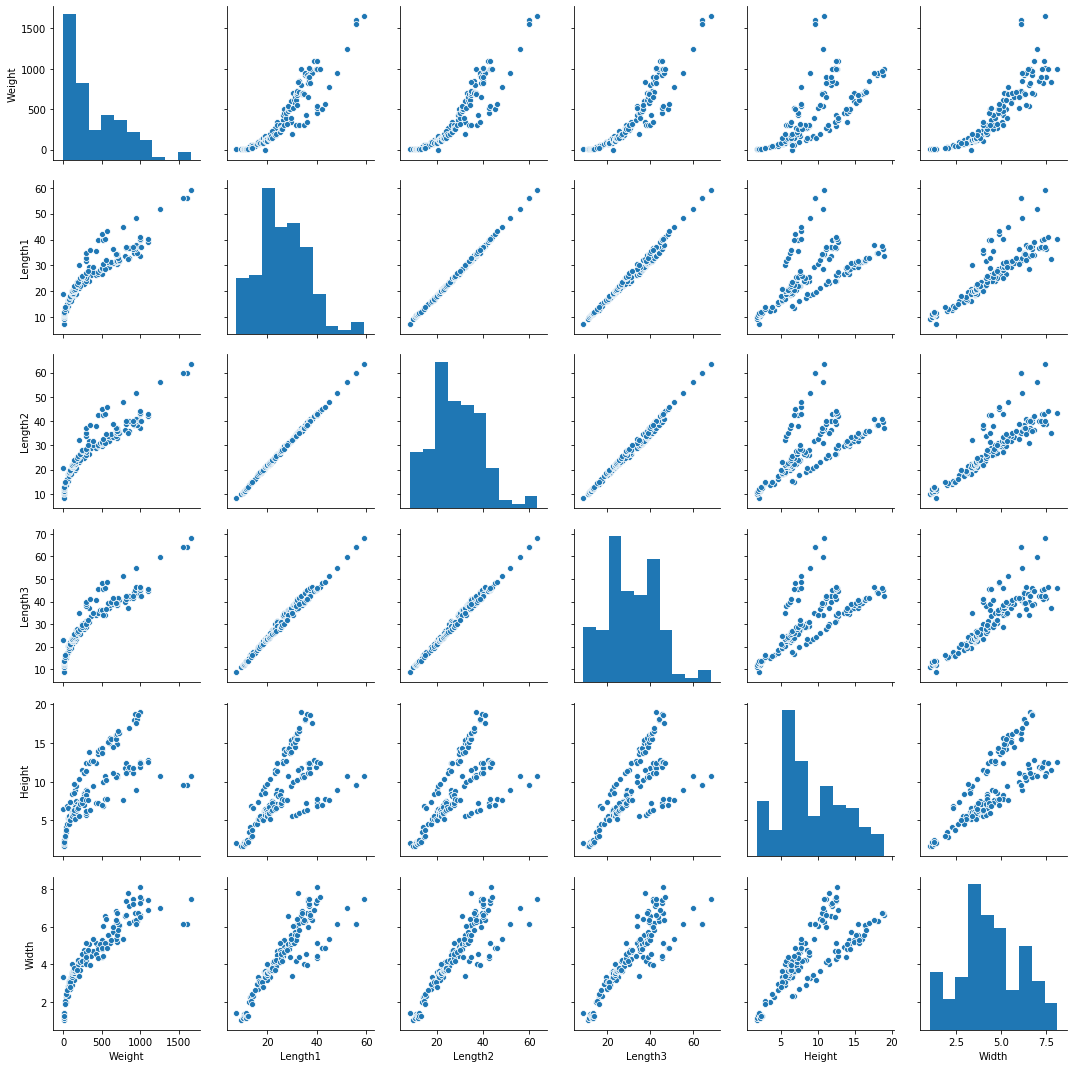

In [10]:
sns.pairplot(data=df,kind='scatter')

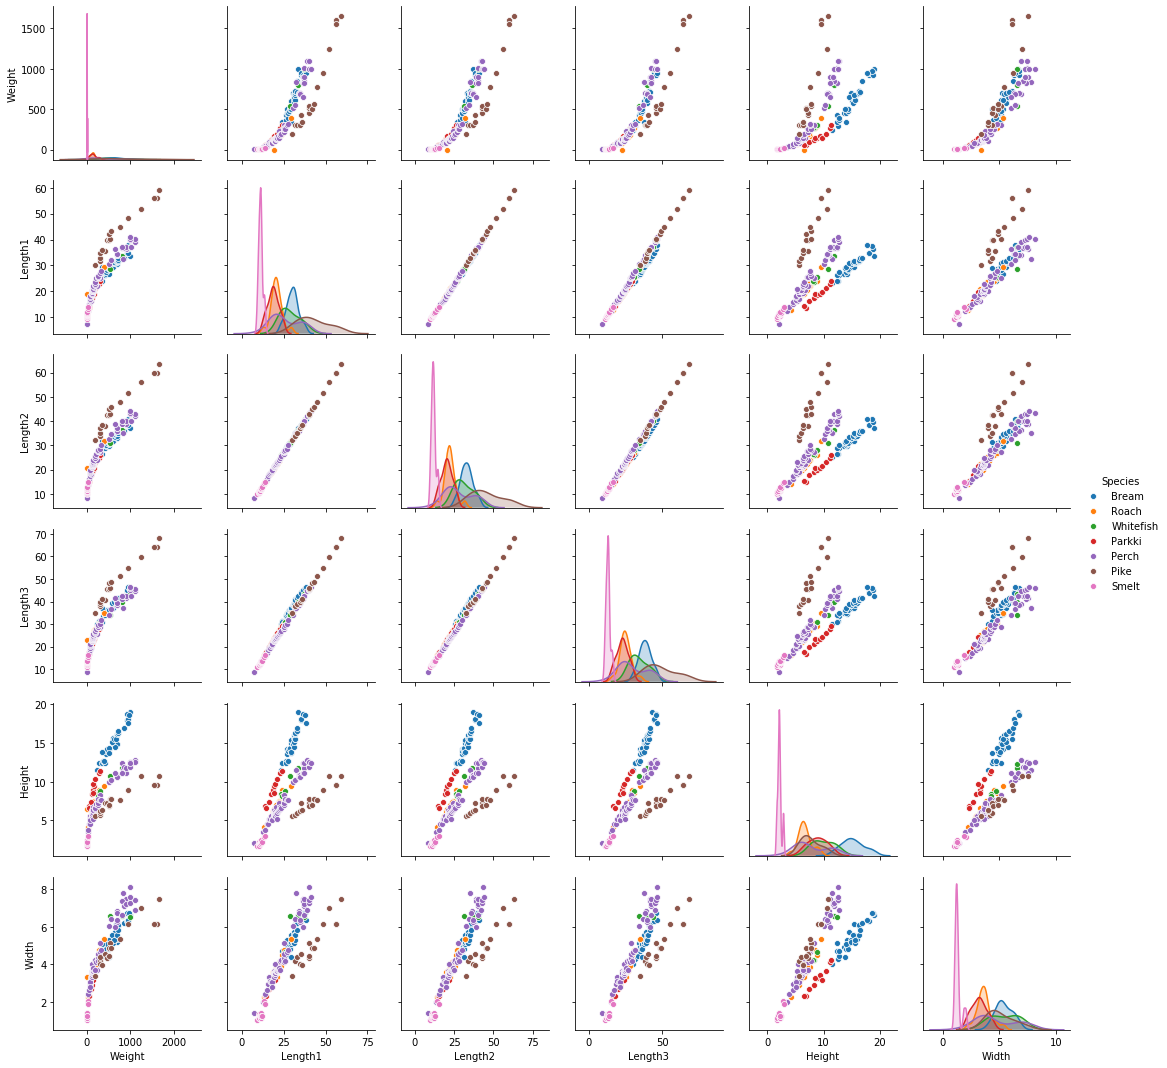

In [11]:
sns.pairplot(df,hue='Species')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


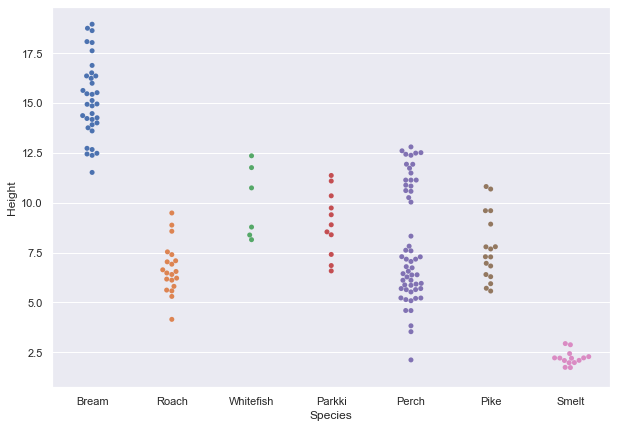

In [13]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Species", y="Height", data=df)

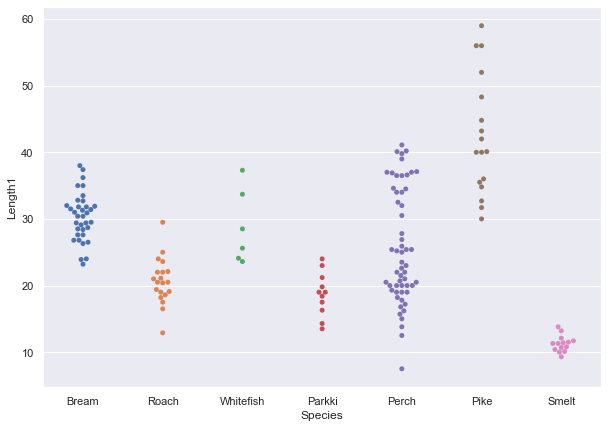

In [14]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Species", y="Length1", data=df)

In [15]:
#Identifying Outliers with Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


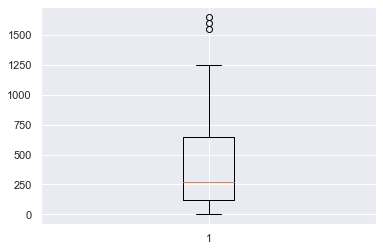

In [16]:
plt.boxplot(df["Weight"])
plt.show()
#three outliers

In [28]:
# as per your wish which range values you have to remove you can
print(df['Weight'].quantile(0.10))
print(df['Weight'].quantile(0.98))

29.58000000000001
1226.0000000000005


In [31]:
# just find the all the outliers and remove if it is effecting those
df[df["Weight"]>df['Weight'].quantile(0.98)]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [34]:
# just find the all the outliers and remove if it is effecting those
df[df["Weight"]<df['Weight'].quantile(0.1)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659


In [35]:
# remove if necessary all the outliers

In [ ]:
plt.boxplot(df["Length1"])
plt.show()
#Two outliers

In [ ]:
plt.boxplot(df["Length2"])
plt.show()
#two outliers

In [ ]:
plt.boxplot(df["Length3"])
plt.show()
#one outliers

In [ ]:
plt.boxplot(df["Width"])
plt.show()
#0 outliers

In [ ]:
plt.boxplot(df["Height"])
plt.show()
#0 outliersrs

In [36]:

from sklearn.model_selection import train_test_split

In [39]:
Features = df.iloc[:,1:]
Features

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [40]:
labels = df.iloc[:,0]
labels

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Features,
                                                    labels,
                                                    test_size=0.2,
                                                   random_state = 1)

In [62]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [64]:

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.90625


In [65]:
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)
#view classification report as above as or below

{'Bream': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'Parkki': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 'Perch': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14},
 'Pike': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 'Roach': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 6},
 'Smelt': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 2},
 'Whitefish': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 1},
 'accuracy': 0.90625,
 'macro avg': {'precision': 0.8714285714285716,
  'recall': 0.9285714285714286,
  'f1-score': 0.8712643678160921,
  'support': 32},
 'weighted avg': {'precision': 0.934375,
  'recall': 0.90625,
  'f1-score': 0.8994971264367817,
  'support': 32}}

In [52]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
      Parkki       1.00      1.00      1.00         1
       Perch       0.93      1.00      0.97        14
        Pike       1.00      1.00      1.00         1
       Roach       1.00      0.50      0.67         6
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.50      1.00      0.67         1

    accuracy                           0.91        32
   macro avg       0.87      0.93      0.87        32
weighted avg       0.93      0.91      0.90        32



In [53]:
# if we see all the Species are performing well except Smelt Whitefish Perch bases on report

In [45]:
y_pred

array(['Bream', 'Roach', 'Bream', 'Perch', 'Perch', 'Bream', 'Roach',
       'Bream', 'Smelt', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Whitefish', 'Perch', 'Parkki', 'Whitefish', 'Perch', 'Perch',
       'Smelt', 'Perch', 'Roach', 'Bream', 'Perch', 'Bream', 'Bream',
       'Smelt', 'Pike', 'Perch', 'Perch', 'Perch'], dtype=object)

In [46]:
y_test

29         Bream
42         Roach
14         Bream
91         Perch
81         Perch
19         Bream
44         Roach
11         Bream
40         Roach
97         Perch
89         Perch
94         Perch
73         Perch
105        Perch
59     Whitefish
90         Perch
66        Parkki
54         Roach
108        Perch
100        Perch
153        Smelt
35         Roach
51         Roach
5          Bream
84         Perch
31         Bream
16         Bream
145        Smelt
143         Pike
93         Perch
127        Perch
103        Perch
Name: Species, dtype: object

In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.71875


In [50]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
      Parkki       0.33      1.00      0.50         1
       Perch       0.73      0.79      0.76        14
        Pike       1.00      1.00      1.00         1
       Roach       0.33      0.17      0.22         6
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.72        32
   macro avg       0.63      0.71      0.64        32
weighted avg       0.71      0.72      0.70        32



In [55]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.59375


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       0.83      0.71      0.77         7
      Parkki       0.17      1.00      0.29         1
       Perch       0.67      0.71      0.69        14
        Pike       1.00      1.00      1.00         1
       Roach       0.00      0.00      0.00         6
       Smelt       0.50      1.00      0.67         2
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.59        32
   macro avg       0.45      0.63      0.49        32
weighted avg       0.54      0.59      0.55        32



C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.90625


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
      Parkki       1.00      1.00      1.00         1
       Perch       0.88      1.00      0.93        14
        Pike       1.00      1.00      1.00         1
       Roach       1.00      0.67      0.80         6
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.91        32
   macro avg       0.79      0.81      0.79        32
weighted avg       0.89      0.91      0.89        32



C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.59375


In [63]:
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.71875


In [89]:
# do one by one as above or perform everything at once as below
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC


In [75]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2) # how well the model is trained
print(metrics.accuracy_score(y_test,Y_pred))#how well the model is predictes
acc_log

0.90625


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


95.28

In [76]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test, Y_pred))
acc_svc

0.625


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


97.64

In [77]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test, Y_pred))
acc_knn

0.59375


74.02

In [86]:
#GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test,Y_pred))
acc_gaussian

0.59375


66.93

In [85]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test, Y_pred))
acc_perceptron

0.65625


40.94

In [84]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test, Y_pred))
acc_linear_svc

0.875


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


75.59

In [83]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test, Y_pred))
acc_sgd

0.25


23.62

In [82]:
# decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test,Y_pred))
acc_decision_tree

0.71875


100.0

In [90]:

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test,Y_pred))
acc_random_forest

0.71875


100.0

In [92]:
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc_XGB = round(clf.score(X_train, y_train) * 100, 2)
print(metrics.accuracy_score(y_test,y_pred))
acc_XGB

0.71875


100.0

In [93]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', "XGB"],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_XGB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
9,XGB,100.00
0,Support Vector Machines,97.64
2,Logistic Regression,95.28
7,Linear SVC,75.59
1,KNN,74.02
4,Naive Bayes,66.93
5,Perceptron,40.94
6,Stochastic Gradient Decent,23.62


In [95]:
# do one by one as above or perform everything at once as below
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [99]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Random_Forest', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Linear_SVM', LinearSVC()))
models.append(('XGB', XGBClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('SGD', Perceptron()))

In [101]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 0.952608 (0.039286)
LDA: 0.978365 (0.033257)
KNN: 0.479301 (0.075387)
CART: 0.720420 (0.097027)


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


NB: 0.572975 (0.089438)
Random_Forest: 0.774747 (0.078788)
SVM: 0.433307 (0.034138)


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the num

Linear_SVM: 0.691769 (0.189566)
XGB: 0.777287 (0.120337)
SGD: 0.185862 (0.134310)


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SGD: 0.236206 (0.084296)
